# Image Classification with CNNs
This project involves classifying images present in the CIFAR-10 dataset

### Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.datasets import cifar10
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

### Load dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
# import tensorflow as tf
# import tensorflow_datasets as tfds

In [7]:
# # Check that GPU is available: cf. https://colab.research.google.com/notebooks/gpu.ipynb
# assert(tf.test.gpu_device_name())

# tf.keras.backend.clear_session()
# tf.config.optimizer.set_jit(False) # Start with XLA disabled.

# def load_data():
#   result = tfds.load('cifar10', batch_size = -1)
#   (x_train, y_train) = result['train']['image'],result['train']['label']
#   (x_test, y_test) = result['test']['image'],result['test']['label']

#   x_train = x_train.numpy().astype('float32') / 256
#   x_test = x_test.numpy().astype('float32') / 256

#   # Convert class vectors to binary class matrices.
#   y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
#   y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
#   return ((x_train, y_train), (x_test, y_test))

# (x_train, y_train), (x_test, y_test) = load_data()

In [3]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

print(type(X_train))

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
<class 'numpy.ndarray'>


### Data exploration

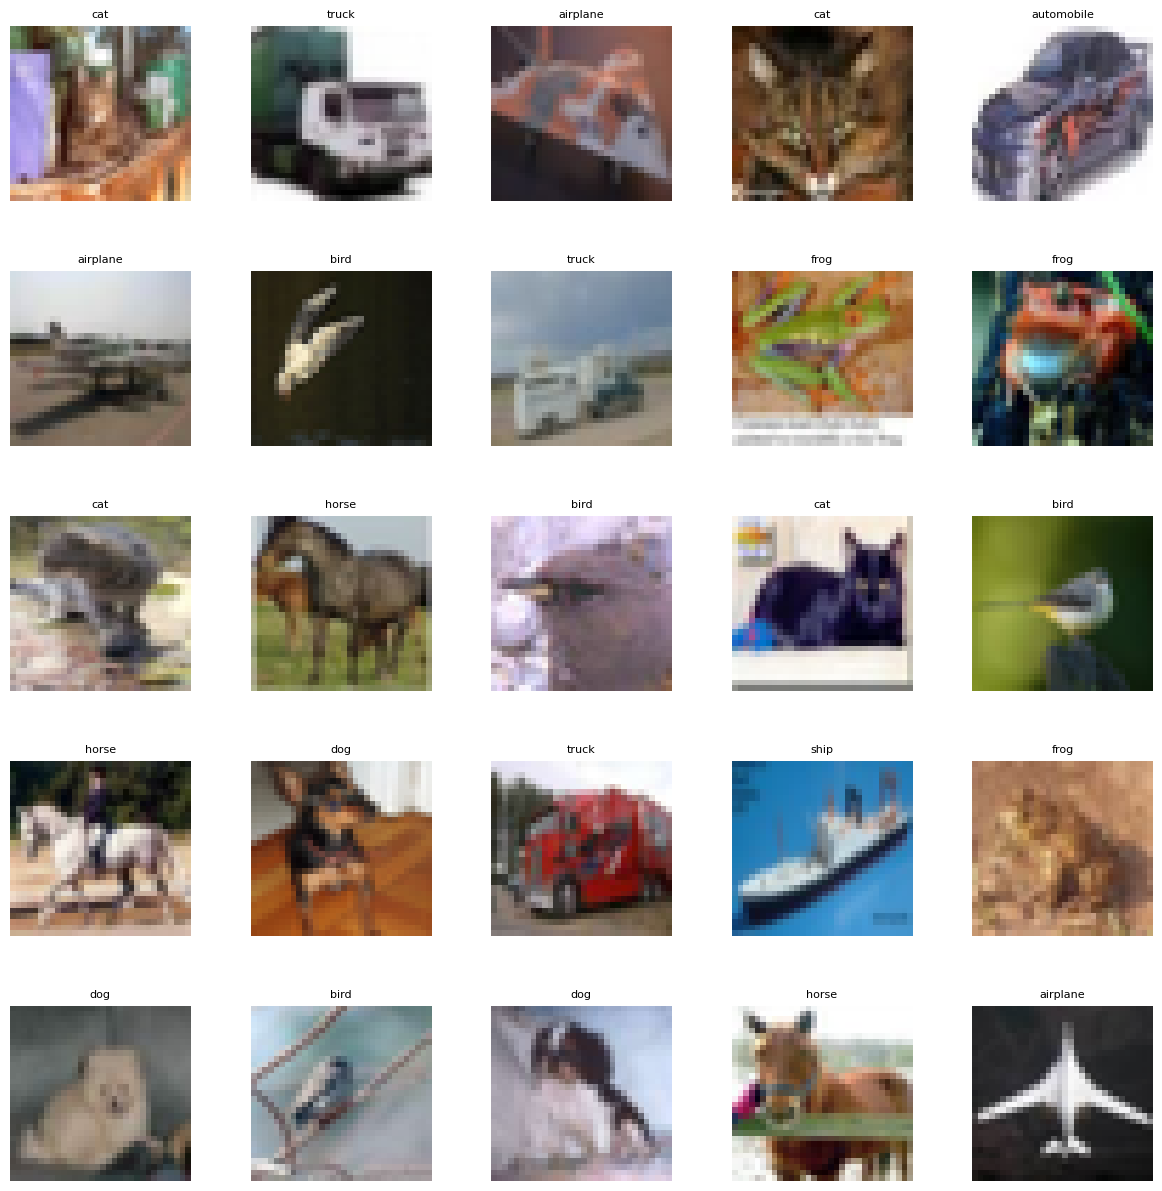

In [4]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

"""Display some of the images in the dataset in a grid format"""

# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# subplot to return the figure object and axes object
fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train)

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

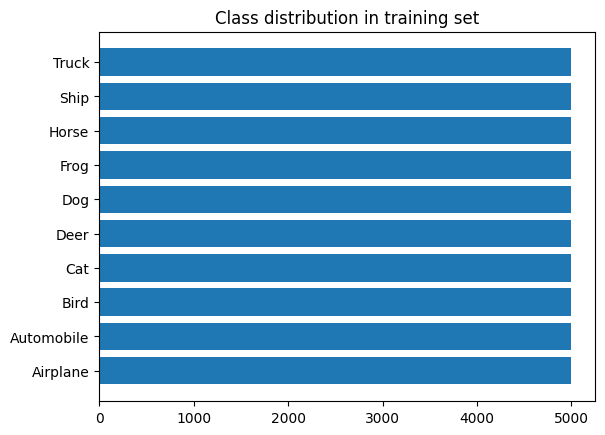

In [5]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Check if training data is balanced
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

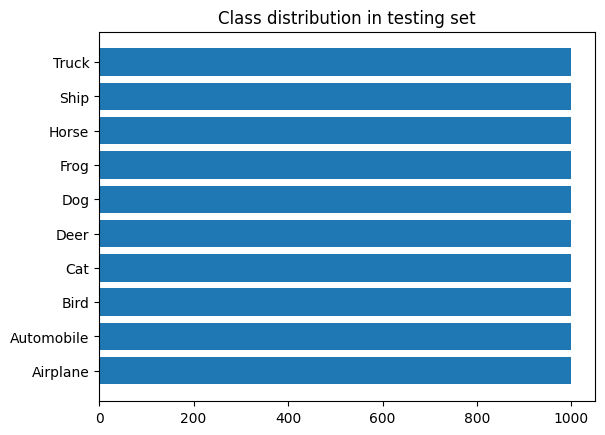

In [6]:
# Check if testing data is balanced
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

### Data preprocessing

In [7]:
# Scale the predictor(independent) variable
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target(dependent) variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [ ]:
# y_cat_train

### Build CNN to carry out image classification

In [8]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

### Data augmentation

In [10]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

### Fit the model(train the model)

In [12]:
r = model.fit(train_generator, 
              epochs=20,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
              batch_size=batch_size,
              )


Epoch 1/20
1562/1562 [==============================] - 330s 211ms/step - loss: 1.5562 - accuracy: 0.4357 - precision: 0.6339 - recall: 0.2236 - val_loss: 1.3037 - val_accuracy: 0.5335 - val_precision: 0.6924 - val_recall: 0.3762
Epoch 2/20
1562/1562 [==============================] - 309s 197ms/step - loss: 1.1984 - accuracy: 0.5783 - precision: 0.7376 - recall: 0.4198 - val_loss: 0.9648 - val_accuracy: 0.6638 - val_precision: 0.7631 - val_recall: 0.5648
Epoch 3/20
1562/1562 [==============================] - 310s 198ms/step - loss: 1.0253 - accuracy: 0.6452 - precision: 0.7752 - recall: 0.5162 - val_loss: 1.0504 - val_accuracy: 0.6442 - val_precision: 0.7463 - val_recall: 0.5590
Epoch 4/20
1562/1562 [==============================] - 3261s 2s/step - loss: 0.9127 - accuracy: 0.6879 - precision: 0.8003 - recall: 0.5783 - val_loss: 0.7616 - val_accuracy: 0.7383 - val_precision: 0.8244 - val_recall: 0.6591
Epoch 5/20
1562/1562 [==============================] - 311s 199ms/step - loss: 0.

### Model evaluation

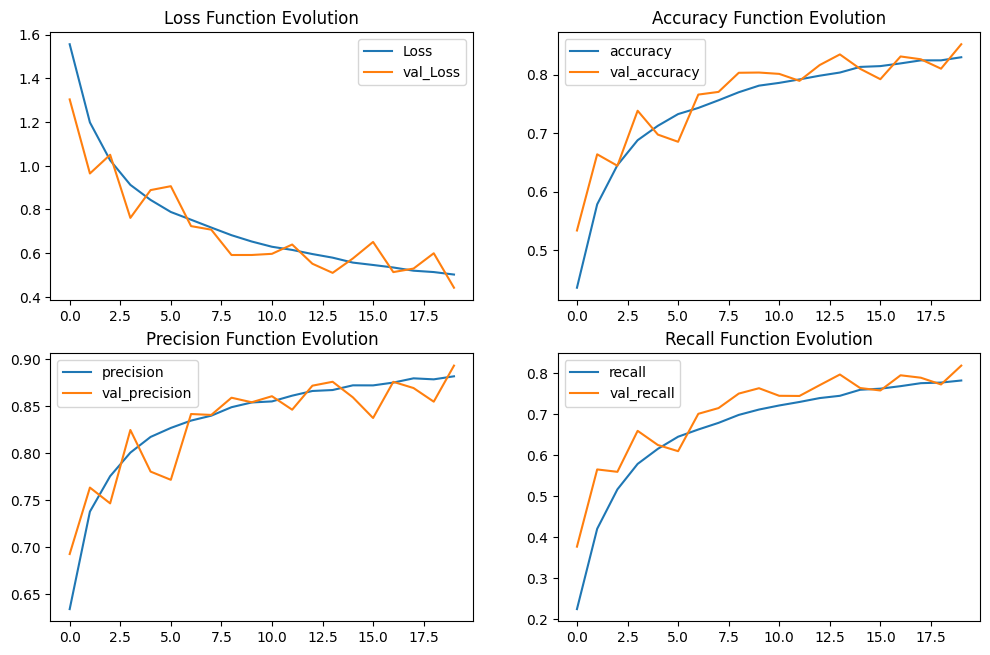

In [13]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [14]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 13s 41ms/step - loss: 0.4421 - accuracy: 0.8520 - precision: 0.8929 - recall: 0.8184
Test Accuracy : 85.20%


In [15]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

313/313 [==============================] - 13s 42ms/step


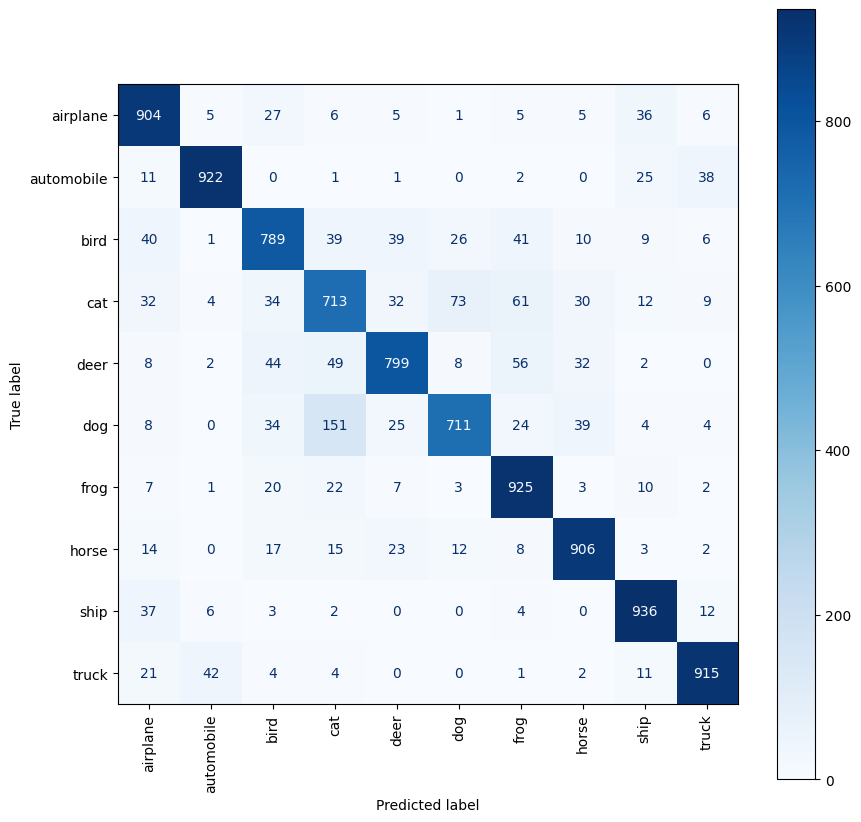

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='Blues')

plt.show()

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1000
           1       0.94      0.92      0.93      1000
           2       0.81      0.79      0.80      1000
           3       0.71      0.71      0.71      1000
           4       0.86      0.80      0.83      1000
           5       0.85      0.71      0.78      1000
           6       0.82      0.93      0.87      1000
           7       0.88      0.91      0.89      1000
           8       0.89      0.94      0.91      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### Test model

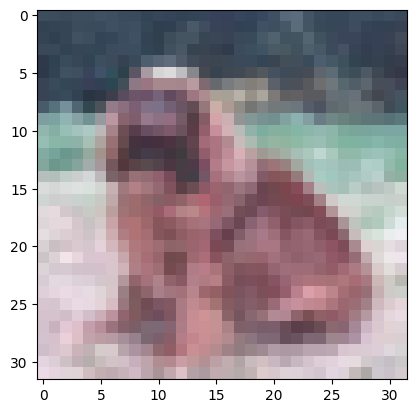

In [25]:
my_image = X_test[101]
plt.imshow(my_image)

In [26]:
# that's a Dog
y_test[101]

array([5], dtype=uint8)

In [27]:
# correctly predicted as a Dog
np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))

1/1 [==============================] - 0s 28ms/step


5

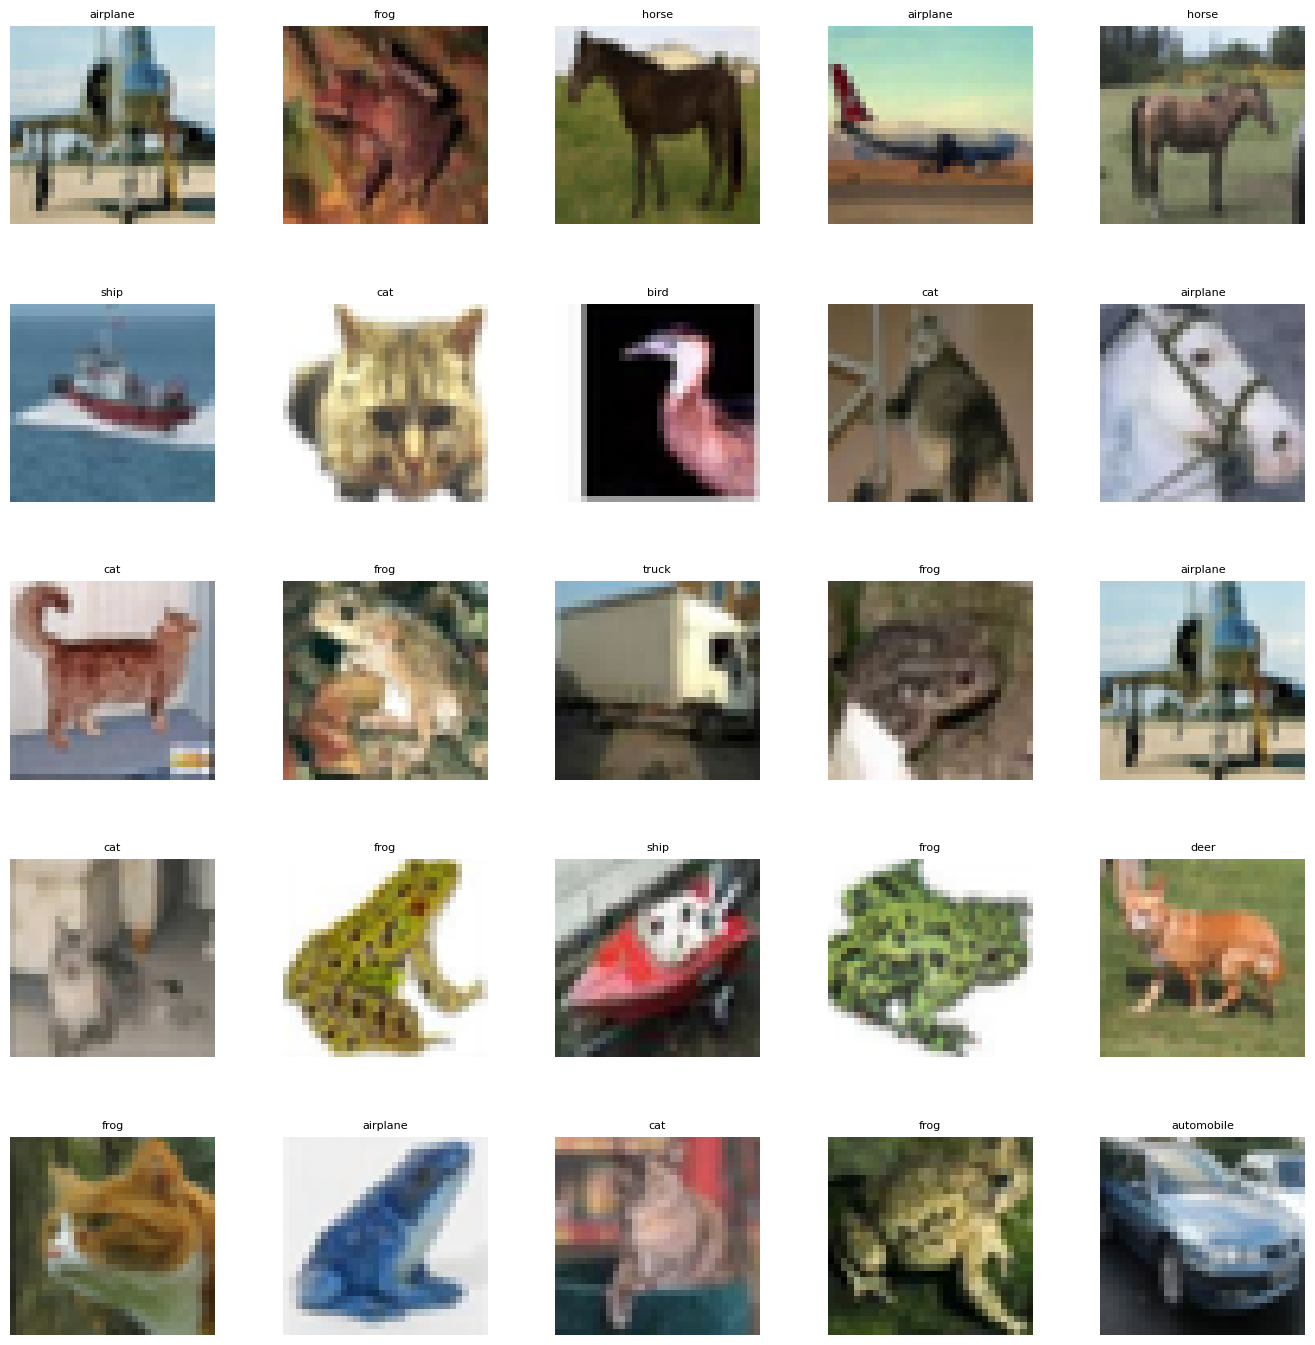

In [28]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    
    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)